In [132]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import pandas.api.types as  ptypes
import seaborn as sb
import sklearn
from sklearn import preprocessing
import pickle
import warnings
import csv
warnings.filterwarnings('ignore')

In [133]:
# import dataset
dataset =  pd.read_csv('50_Startups.csv')

In [134]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [135]:
dataset.shape

(50, 5)

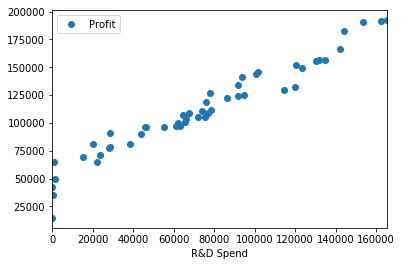

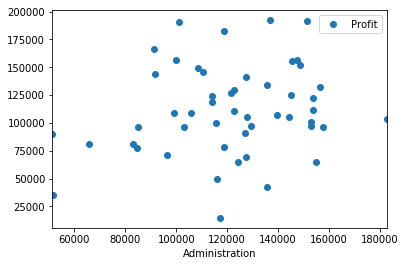

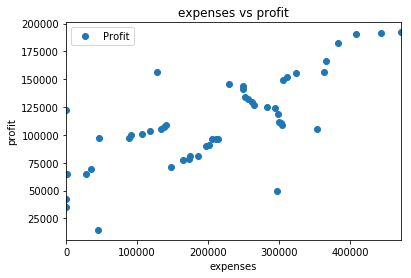

In [136]:
# ploting expenses vs profit
dataset.plot(x='R&D Spend', y='Profit', style='o')  
dataset.plot(x='Administration', y='Profit', style='o')
dataset.plot(x='Marketing Spend', y='Profit', style='o')
plt.title('expenses vs profit')  
plt.xlabel('expenses')  
plt.ylabel('profit')  
plt.show()

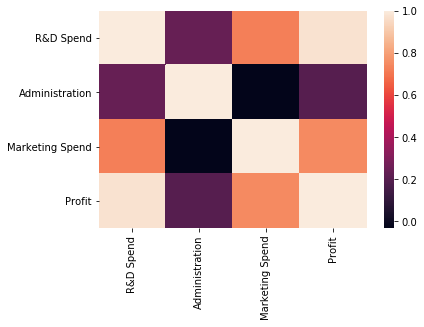

In [137]:
# correlation between columns
corr = dataset.corr()
sb.heatmap(corr)

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(dataset,test_size = 0.20)

In [139]:
# save test data into csv file
x_test.to_csv('Test/test.csv',index=False)

In [140]:
# save train data into csv file 
x_train.to_csv('Train/train.csv',index=False)

In [141]:
# reading train csv file
train_data = pd.read_csv('Train/train.csv')

In [142]:
# split train data into training data and testing data
from sklearn.model_selection import train_test_split
x_train_data,cross_valid = train_test_split(x_train,test_size = 0.20)

In [143]:
# save cross validation data to csv file
cross_valid.to_csv('CrossValidate/cross_validate.csv',index=False)

In [144]:
# split x_train_data into x and y  
x = x_train_data.iloc[:,:-1].values
y = x_train_data.iloc[:,4].values

In [145]:
y=y.reshape(-1,1)

In [146]:
x_train_data.shape,cross_valid.shape

((32, 5), (8, 5))

In [147]:
""" Data Preprocessing """
from sklearn.preprocessing import Imputer
from  sklearn.preprocessing import LabelEncoder, OneHotEncoder
from  sklearn.preprocessing import StandardScaler
class Data_preprocessing:
    
#     handling missind data
    def handel_missing_data(self,dataset):
        imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
        imputer = imputer.fit(dataset[:,1:3])
        dataset[:,1:3] = imputer.transform(dataset[:,1:3])
        return dataset
    
#       encoding categorical data
    def encode_categorical_data(self,handled_data):
        label_encoder_train = LabelEncoder()
        handled_data[:,3] = label_encoder_train.fit_transform(handled_data[:,3])
        onehotencoder = OneHotEncoder(categorical_features=[3])
        handled_data = onehotencoder.fit_transform(handled_data).toarray()
        return handled_data
    
#     encodedependent variable
    def encode_dependent_variable(self,y):
        label_encoder_y = LabelEncoder()
        y = label_encoder_y.fit_transform(y)
        return y
    def feature_scaling(self,x_cv):
        ss = StandardScaler()
        x_cv = ss.fit_transform(x_cv)
        return x_cv


In [148]:
# instantiation and Dataprepreprocessing 
obj =  Data_preprocessing()
handled_data = obj.handel_missing_data(x)
x_encode = obj.encode_categorical_data(handled_data)
y_encode = obj.encode_dependent_variable(y)

In [149]:
# reading cross validation scv file
cross_valid =  pd.read_csv('CrossValidate/cross_validate.csv')
# split  cross validate data into x_cv and y_cv
x_cv = cross_valid.iloc[:,:-1].values
y_cv = cross_valid.iloc[:,1].values
# encode x_cv data
obj_dp =  Data_preprocessing()
x_cv = obj_dp.encode_categorical_data(x_cv)
x_cv =  obj_dp.feature_scaling(x_cv)

In [150]:
y_cv = y_cv.reshape(-1,1)

In [151]:
y_cv.shape

(8, 1)

In [152]:
"""Training Model  """
from sklearn.linear_model import LinearRegression
class Training_Model:
    
#     fitting multi linear regression to training set
    def Fit_Model(self,x,y):
        regressor = LinearRegression()
        regressor.fit(x,y)
        regressor.score(x,y)
        return regressor
    
#     predicting the  train set result
    def prediction_train(self,x_test):
        y_predict_train = regressor.predict(x_test)
        return y_predict_train
    
#     predicting the cross  validation result
    def prediction_cv(self,x_cv):
        y_predict_cv = regressor.predict(x_cv)
        return y_predict_cv

In [153]:
# training model
obj_model = Training_Model()
regressor=obj_model.Fit_Model(x_encode,y_encode)
y_predict_train = obj_model.prediction_train(x_encode)
y_predict_cv = obj_model.prediction_cv(x_cv)

In [154]:
train_accuracy = sklearn.metrics.explained_variance_score(y_encode,y_predict_train)*100
# train_accuracy = (1-train_accuracy)*100
print("Accuracy of train data =",train_accuracy)

test_accuraccy = sklearn.metrics.explained_variance_score(y_cv,y_predict_cv)
test_accuraccy = (1-test_accuraccy)*100
print("Accuracy of test data =",  test_accuraccy)

Accuracy of train data = 93.12415231590062
Accuracy of test data = 99.99963472183956


In [155]:
# create model with pickle file
file = open('training.pkl', 'wb')
pickle.dump(regressor,file)
file.close()